WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
5005
THESE ARE ALL THE SHAPES IN THE CURRENT PACK


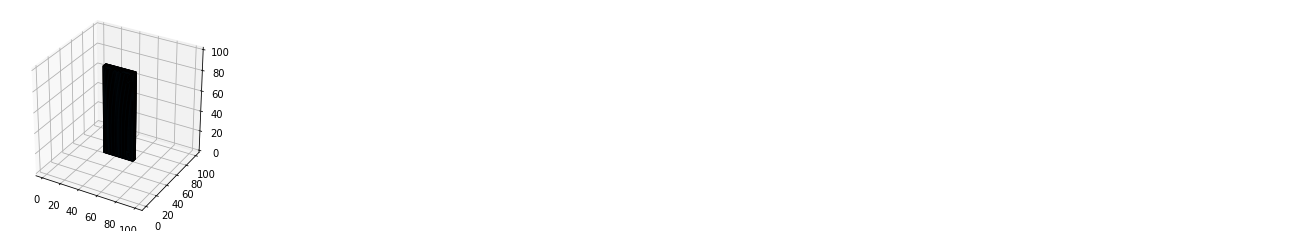

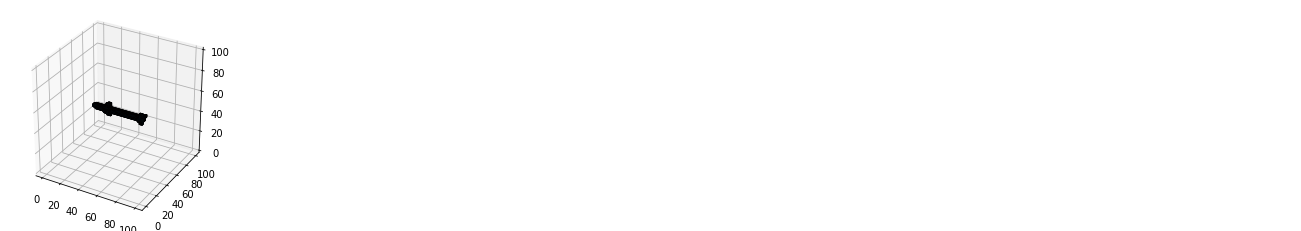

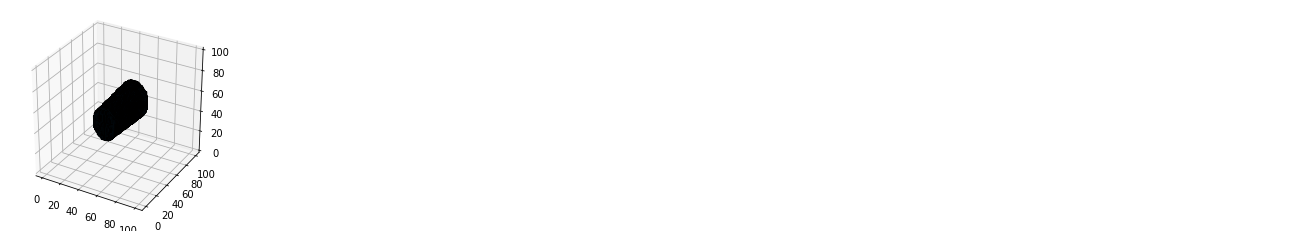

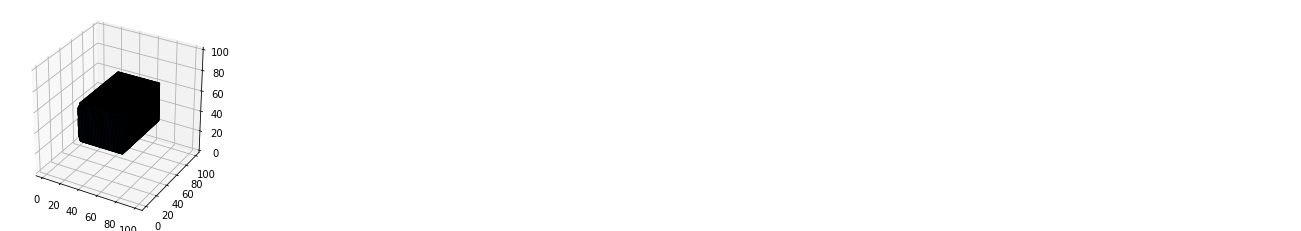

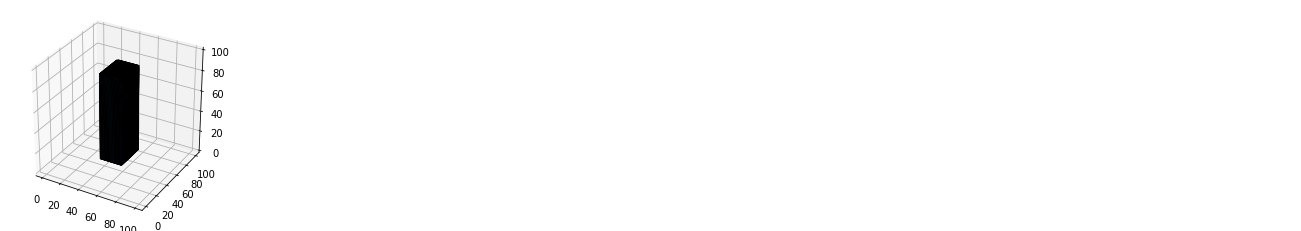

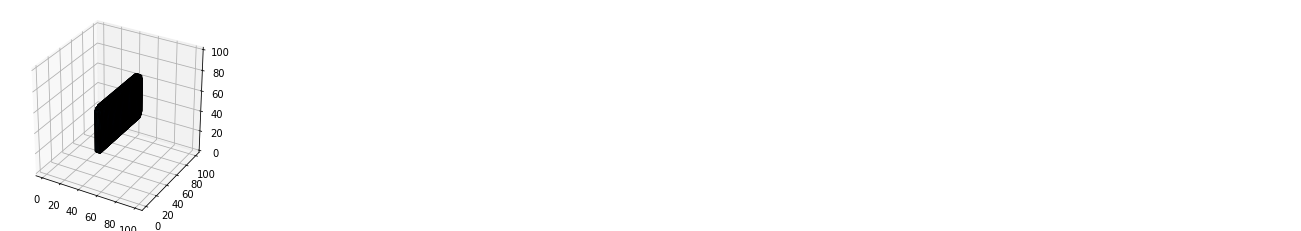

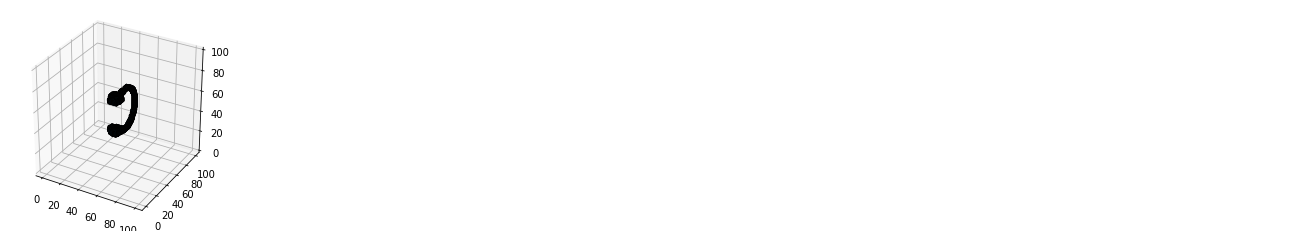

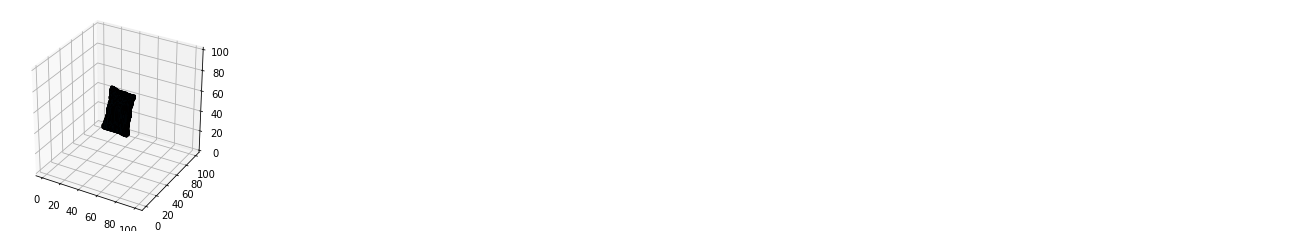

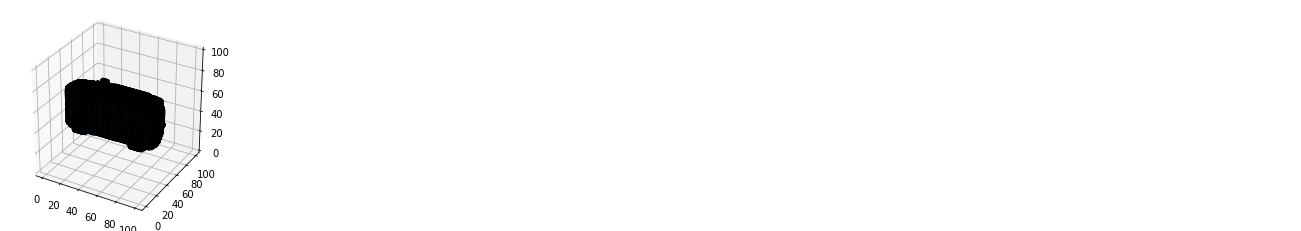

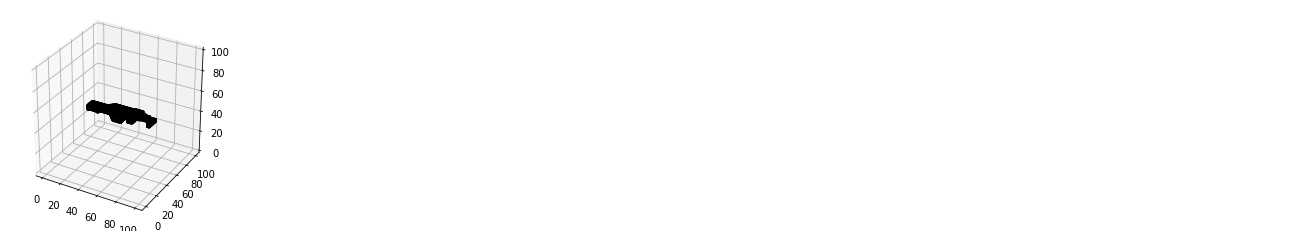

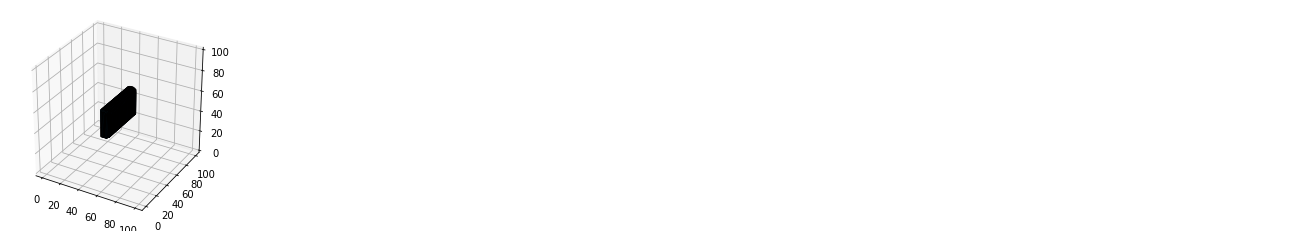

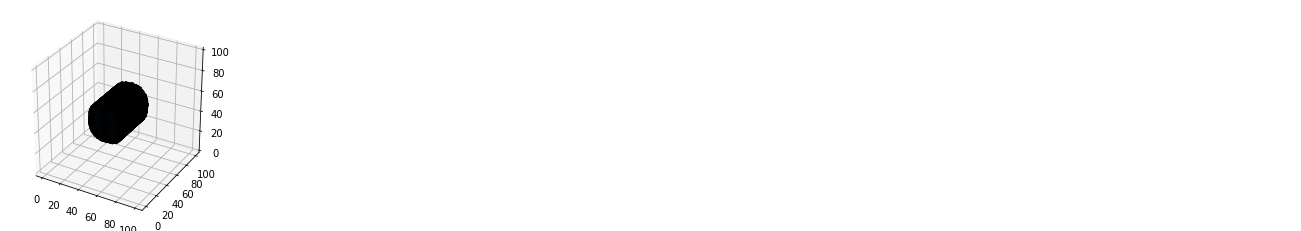

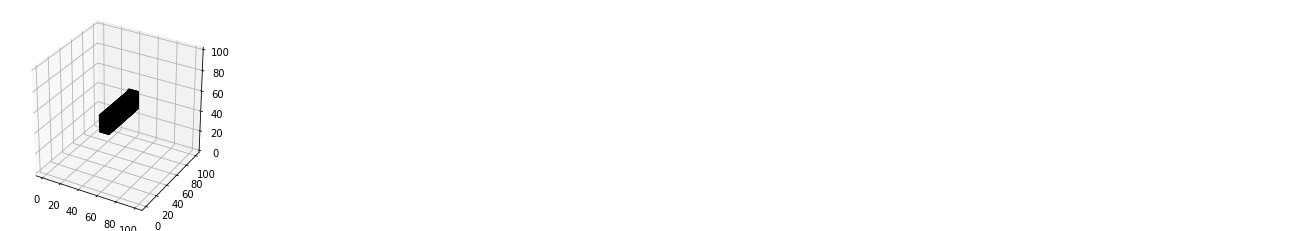

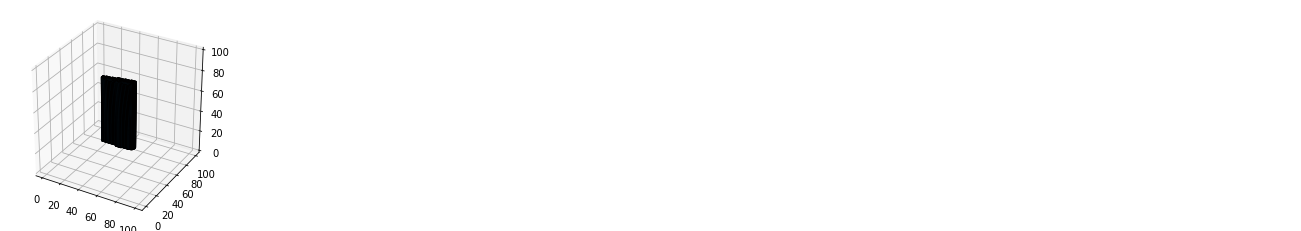

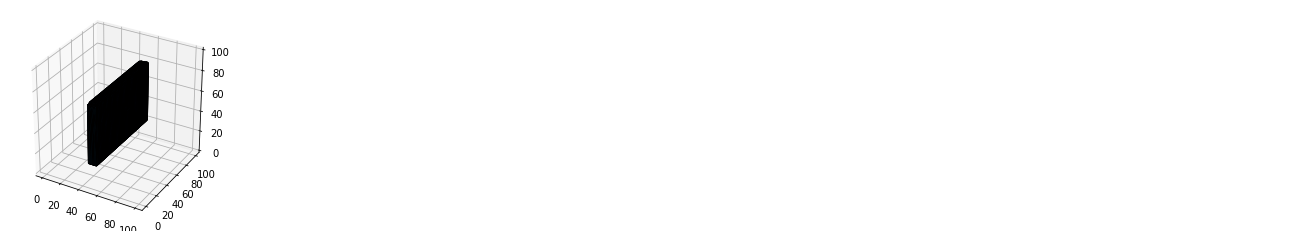

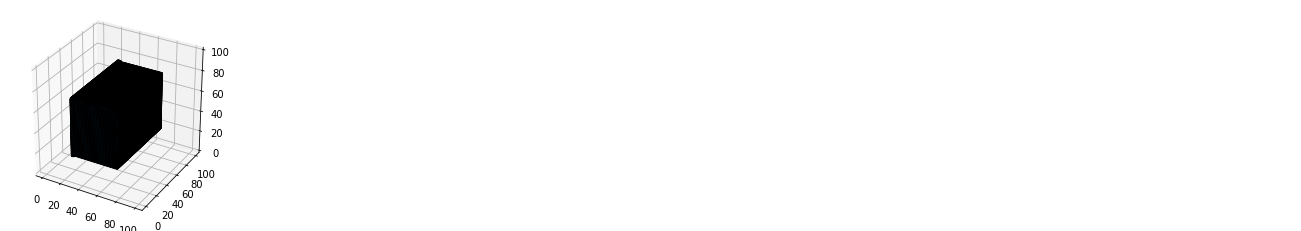

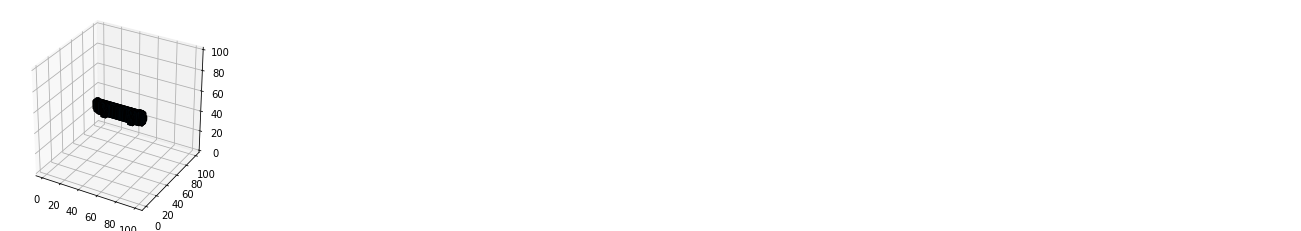

STEP 0
---------
SHAPE MASK: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


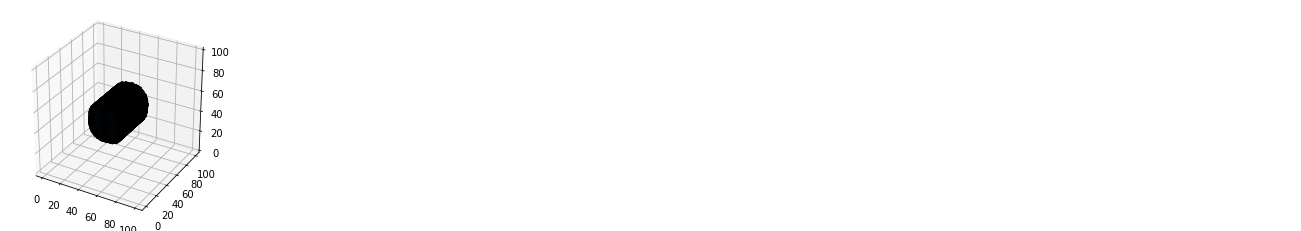

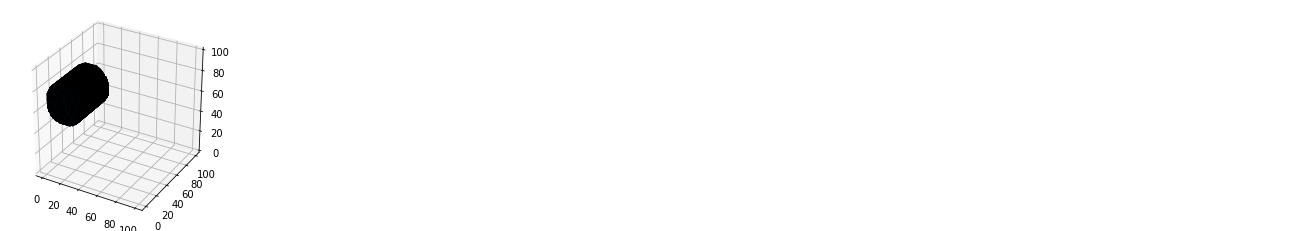

STEP 1
---------
SHAPE MASK: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


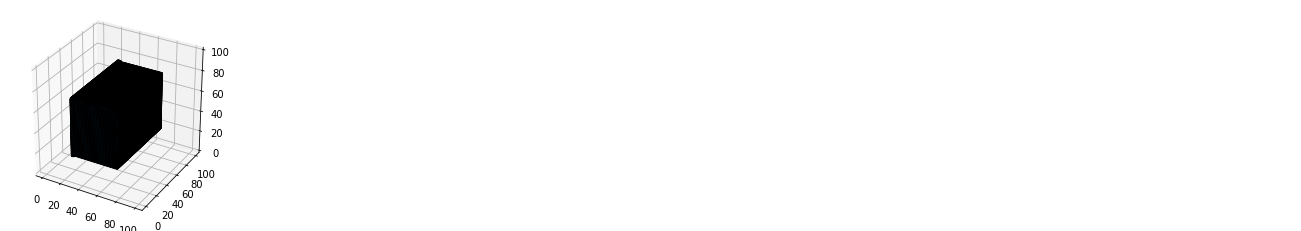

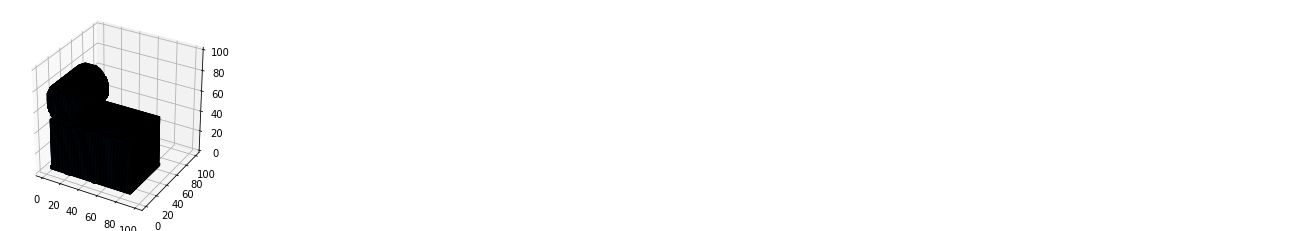

STEP 2
---------
SHAPE MASK: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


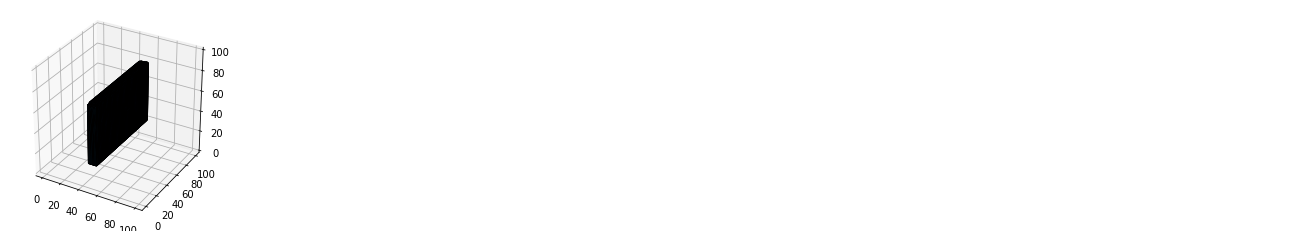

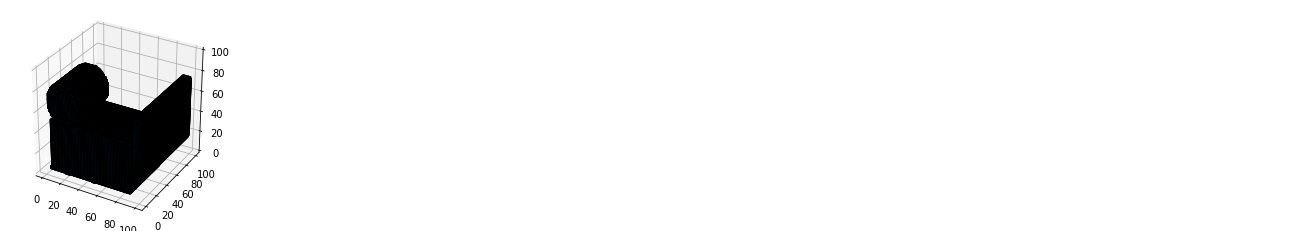

STEP 3
---------
SHAPE MASK: [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


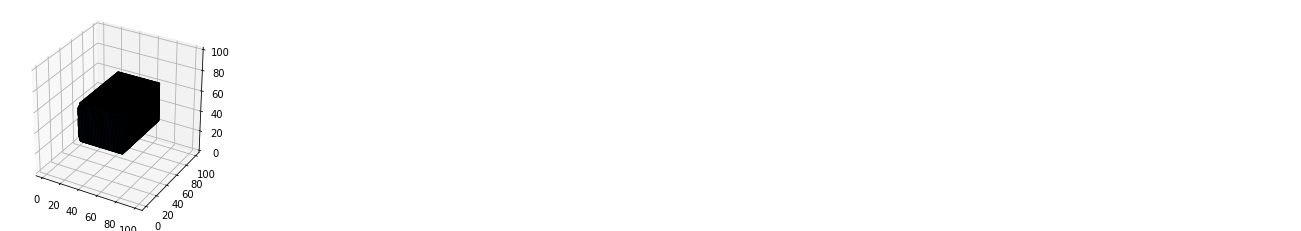

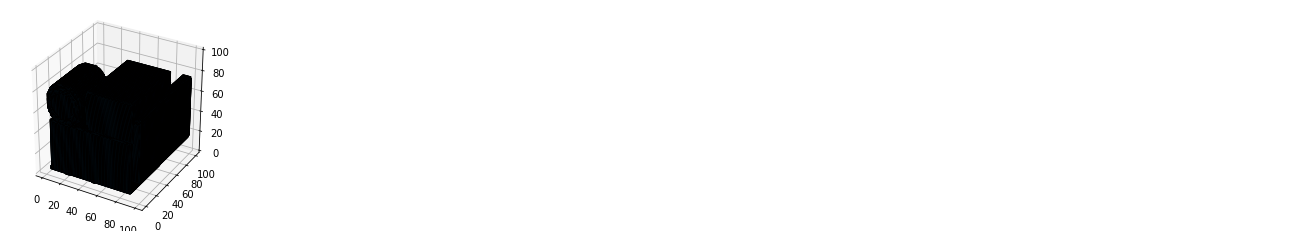

STEP 4
---------
SHAPE MASK: [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


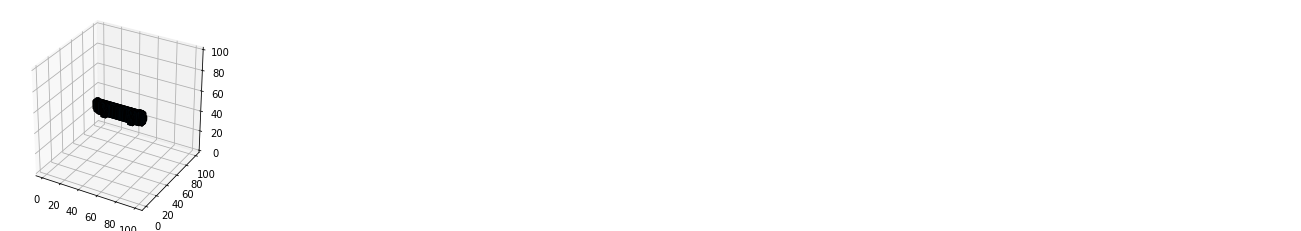

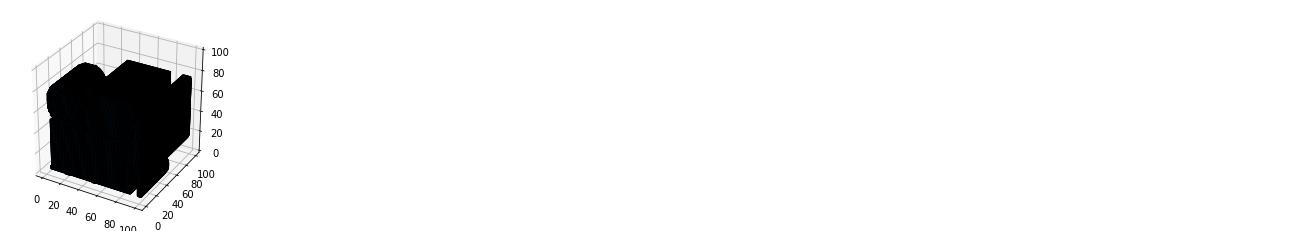

STEP 5
---------
SHAPE MASK: [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


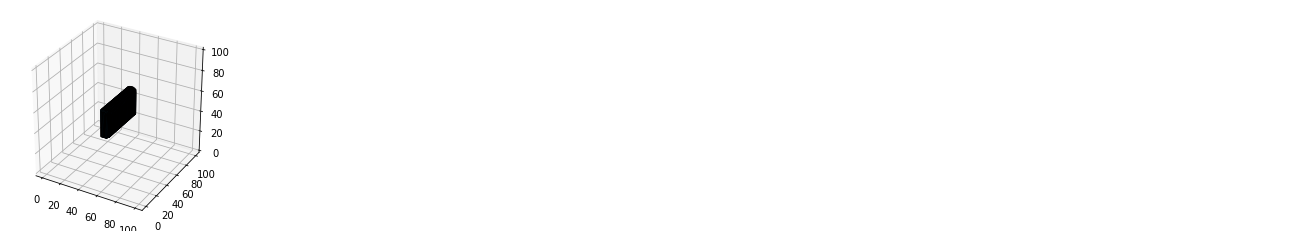

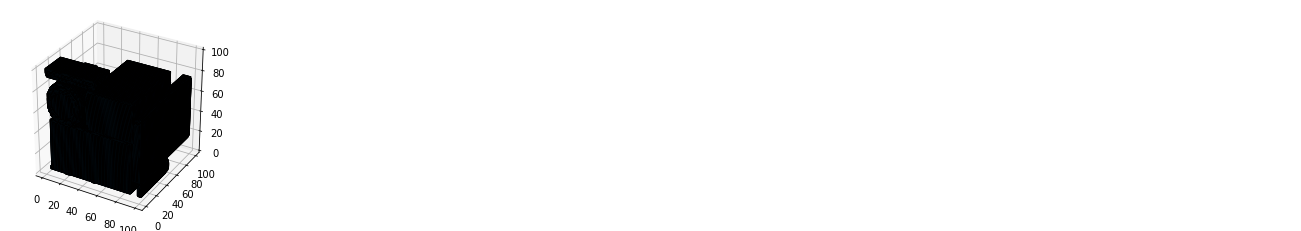

STEP 6
---------
SHAPE MASK: [1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


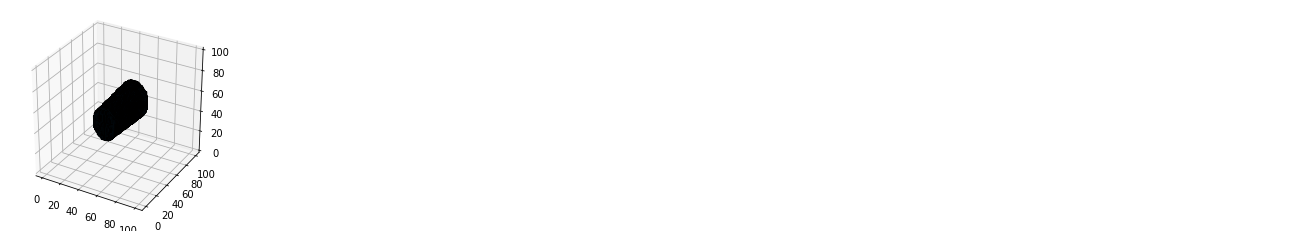

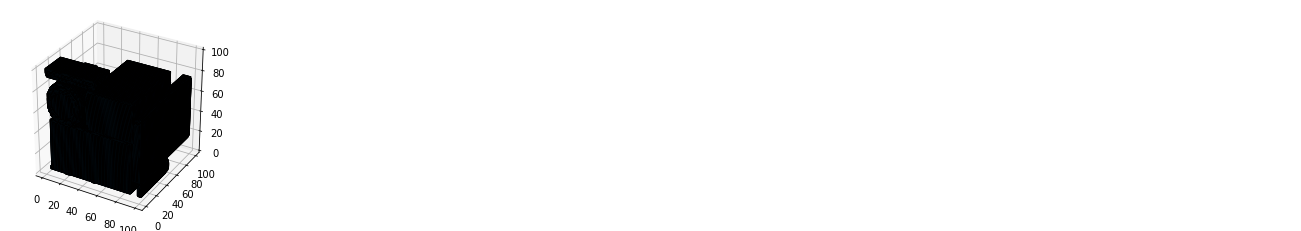

STEP 7
---------
SHAPE MASK: [1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


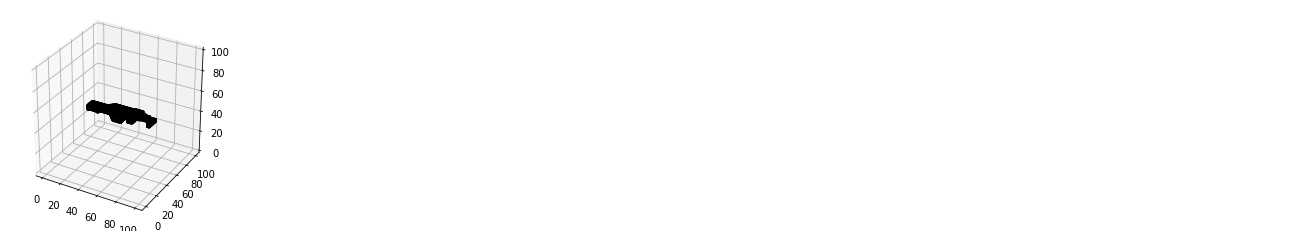

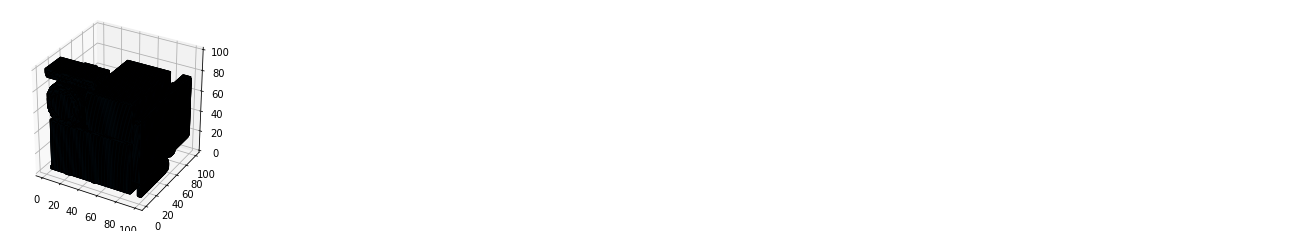

STEP 8
---------
SHAPE MASK: [1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


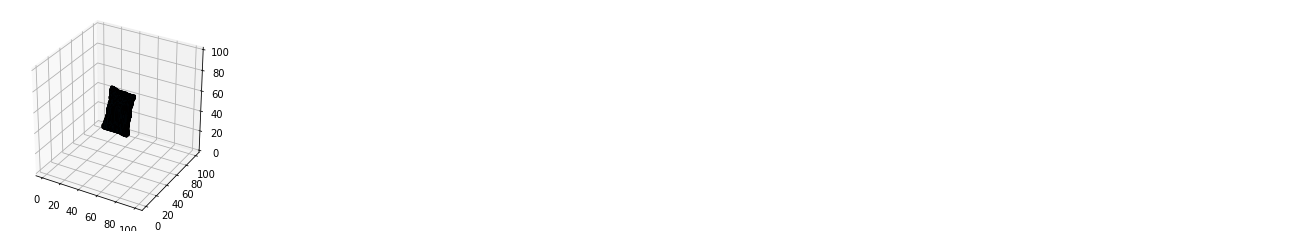

In [ ]:
"""
Code to use the environment
For visualizing different packs, change the FILE_ID_TO_TEST ([Name of file, id of the pack in the file]) variable 
First all the objects in the pack are displayed
Next, the packing is done using the ground-truth actions
Next, the chosen object and the pack configuration after putting the object are displayed in sequence
cur_obs2["sha_mask"] variable shows the objects left to be chosen
"""

# setting up import paths
import sys
sys.path.insert(0, './')
sys.path.insert(0, './unity/')
sys.path.insert(0, './stable-baselines//')

%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax
from packing.packing_env import PackingEnv

ENV_NAME = 'unity/envs/packit'
FILE_ID_TO_TEST = ['pack_va/0_va', 0]

env = PackingEnv(
    env_name=ENV_NAME,
    rot_before_mov=True,
    get_gt=True,
    shuffle=False,
    file_id_lst=[FILE_ID_TO_TEST],
    output_sparse=False)
obs1 = env.reset()

print("THESE ARE ALL THE SHAPES IN THE CURRENT PACK")
# voxel representation of all the shapes
obs = env._decode_agent_obs(obs1)
for i in range(obs["num_sha"][0]):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect('equal')
    ax.voxels(obs["sha_rep"][0][i], edgecolor="k")
    plt.show()

for i in range(env._decode_agent_obs(obs1)["num_sha"][0]):
    print("STEP {}".format(i))
    print("---------")
    cur_obs1, _, _, _ = env.step(env.get_gt_action())
    cur_obs1 = PackingEnv._decode_agent_obs(cur_obs1)
    env.step(env.get_gt_action())
    cur_obs2, _, _, _ = env.step(env.get_gt_action())
    cur_obs2 = PackingEnv._decode_agent_obs(cur_obs2)
    print("SHAPE MASK: {}".format(cur_obs2["sha_mask"][0]))

    fig1 = plt.figure(1)
    ax1 = fig1.gca(projection='3d')
    ax1.set_aspect('equal')
    ax1.voxels(cur_obs1["cho_sha_rep"][0], edgecolor="k")
  
    fig2 = plt.figure(2)
    ax2 = fig2.gca(projection='3d')
    ax2.set_aspect('equal')
    ax2.voxels(cur_obs2["box_rep"][0], edgecolor="k")
  
    plt.show()